(167, 10)


<AxesSubplot: >

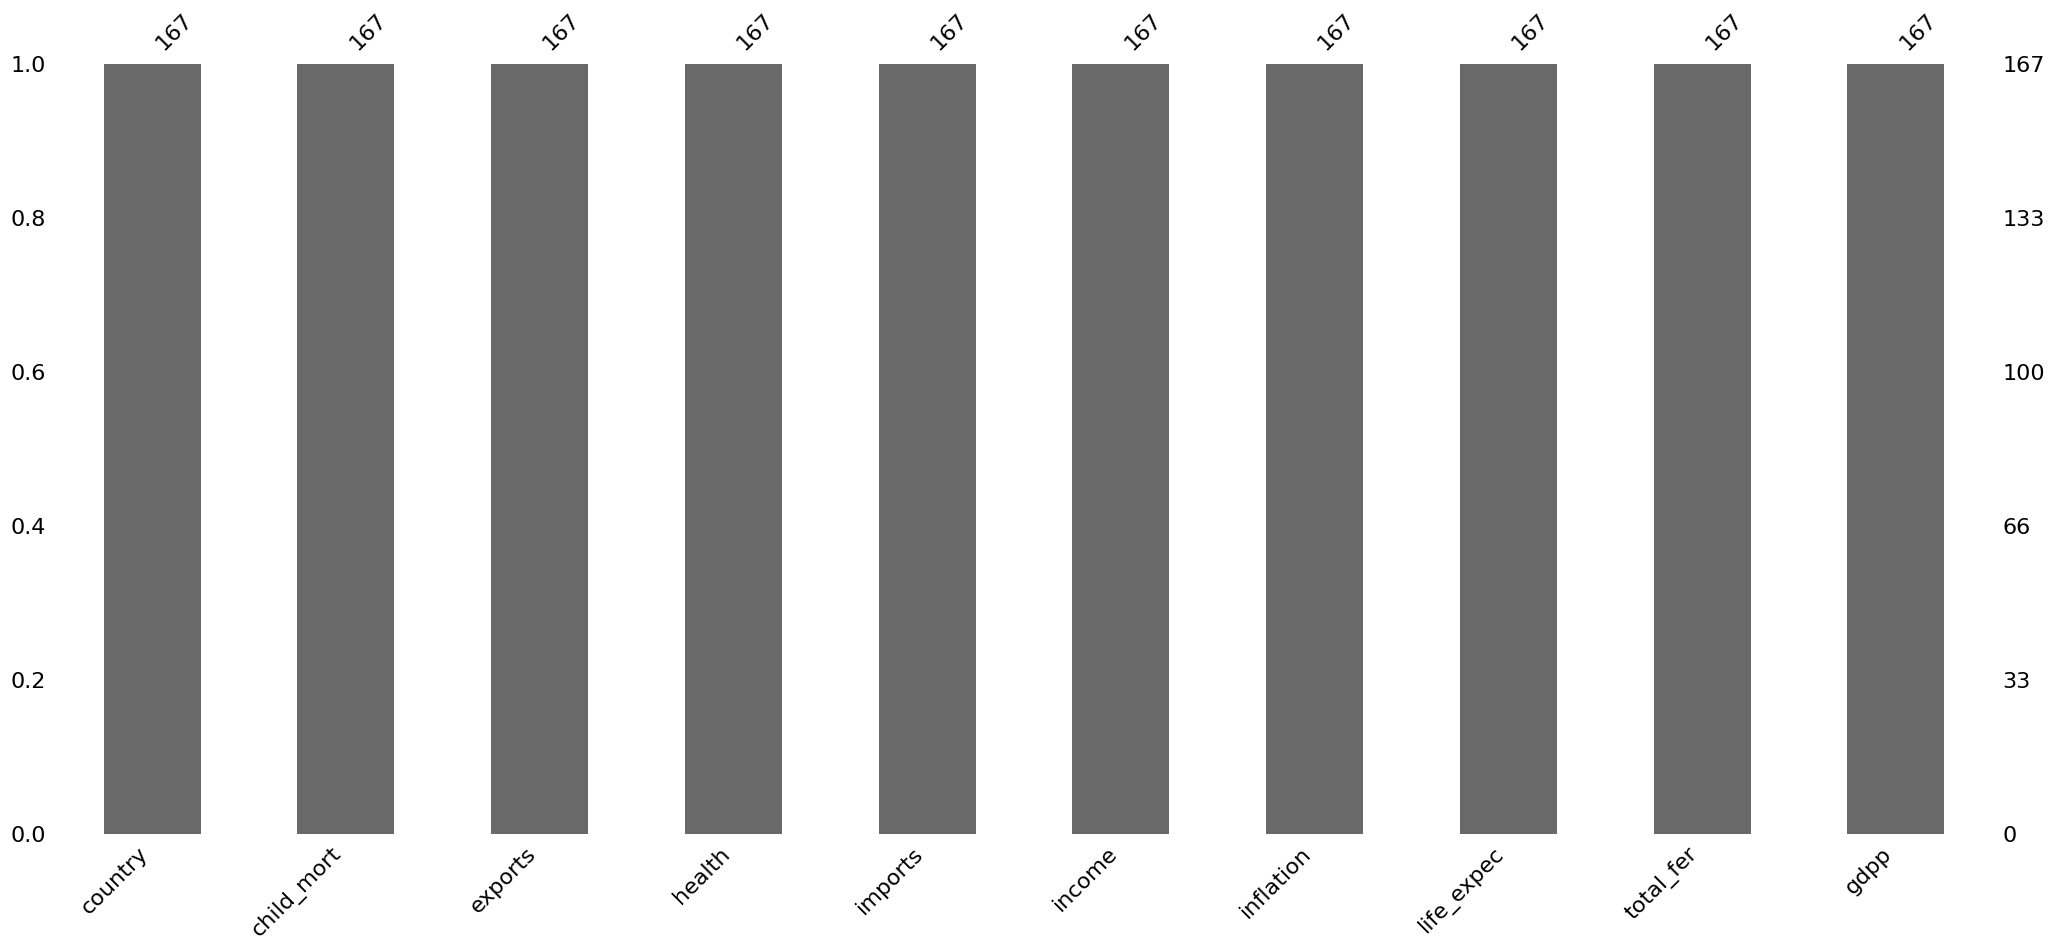

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics, preprocessing
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from kneed import KneeLocator

data = pd.read_csv('files\Country-data.csv')

print(data.shape)

msno.bar(data, sort='ascending')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [14]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [16]:
data.corr().style.background_gradient('Reds')

C:\Users\admin\AppData\Local\Temp\ipykernel_16872\1457163991.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient('Reds')


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [17]:
data.drop(columns=['country'], inplace=True)

mm_scaler = MinMaxScaler()

X = mm_scaler.fit_transform(data)

print(X)

[[0.42648491 0.04948197 0.35860783 ... 0.47534517 0.73659306 0.00307343]
 [0.06815969 0.13953104 0.29459291 ... 0.87179487 0.07886435 0.03683341]
 [0.12025316 0.1915594  0.14667495 ... 0.87573964 0.27444795 0.04036499]
 ...
 [0.10077897 0.35965101 0.31261653 ... 0.8086785  0.12618297 0.01029885]
 [0.26144109 0.1495365  0.20944686 ... 0.69822485 0.55520505 0.01029885]
 [0.39191821 0.18455558 0.25357365 ... 0.39250493 0.670347   0.01173057]]


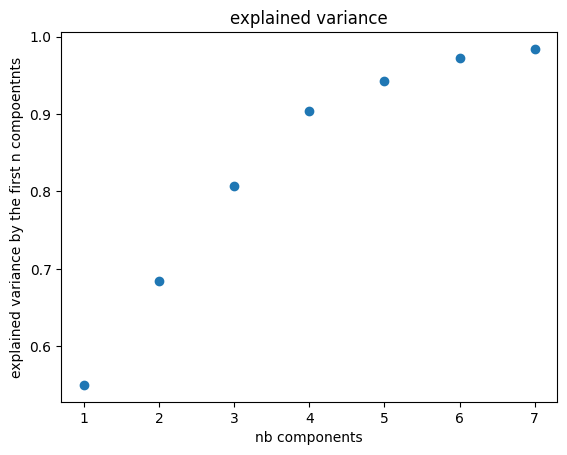

In [19]:
pca = PCA().fit(X)
variance_ratio = pca.explained_variance_ratio_
n_components = 8
explained_variances = list()
for k in range(n_components):
    explained_variance = sum(variance_ratio[:k])
    explained_variances.append(explained_variance)

plt.plot(range(1, n_components), explained_variances[1:], "o")
plt.title("explained variance")
plt.xlabel("nb components")
plt.ylabel("explained variance by the first n compoentnts")
plt.show()
plt.close()

We see that PCA for 3 parameters permit to keep more than 80% of the variance in the dataset.

In [20]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)
pca_data = pd.DataFrame(data=components, columns=['component 1', 'component 2', 'component 3'])

pca_data.head()

,component 1,component 2,component 3
0,-0.599078,0.095490,0.157554
1,0.158474,-0.212092,-0.064189
2,0.003686,-0.135867,-0.134182
3,-0.650235,0.275975,-0.142672
4,0.200711,-0.064662,-0.100715


3


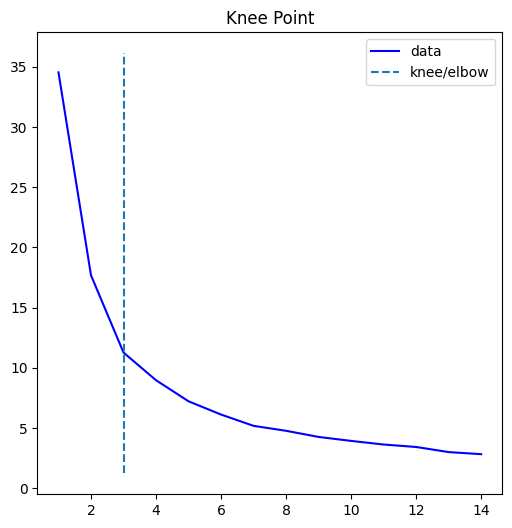

In [21]:
nbs_of_clusters = range(1, 15)
inertias = []

"""
add lines here
"""
for nb_cluster in nbs_of_clusters:
    kmeans = KMeans(n_clusters=nb_cluster, init='k-means++', n_init=10, random_state=5).fit(pca_data)
    inertias.append(kmeans.inertia_)

kneedle = KneeLocator(nbs_of_clusters, inertias, S=1, curve="convex", direction="decreasing")
print(kneedle.knee)
kneedle.plot_knee()

In [22]:
pca_data.to_csv('files\pca_data.csv', index=False)